In [71]:
import pandas as pd
import numpy as np 


import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt 

from matplotlib.dates import DateFormatter, DayLocator
%matplotlib inline
from scipy import stats
from statsmodels.graphics.api import qqplot

from statsmodels.tsa.stattools import adfuller, zivot_andrews

#

In [125]:
n =240

y = np.zeros(n) 
z = np.zeros(n)
μ = np.zeros(n)



for i in range(1,n):
    
    v = np.random.normal(0, 1, 1)
    εy = np.random.normal(0, 1, 1)
    εz = np.random.normal(0, 1, 1)
    
    μ[i] = μ[i-1] + v
    y[i] = μ[i] + εy
    z[i] = μ[i] + εz

y = pd.Series(y)    
z = pd.Series(z)  

frame = {'y':y,'z':z}
df = pd.DataFrame(frame) 
df.index = pd.period_range('1981-01-01', '2000-12-01', freq='M')
df['y-z']=df['y']-df['z']


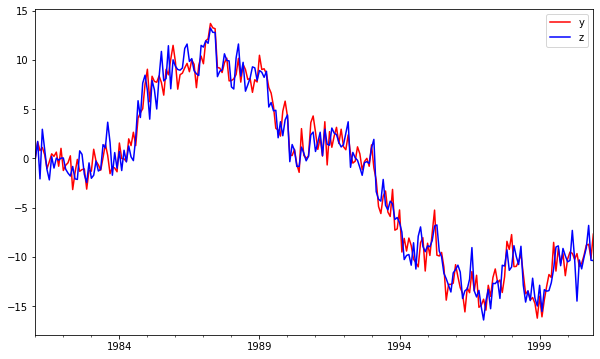

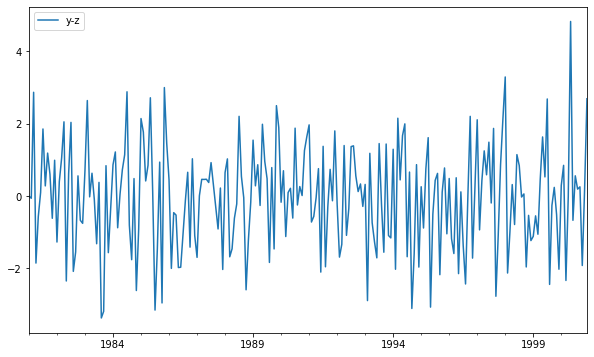

In [126]:
plt.figure(figsize=(10,6))
df.y.plot(color='r')
df.z.plot(color='b')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,6))
df['y-z'].plot()
plt.legend(loc='best')
plt.show()

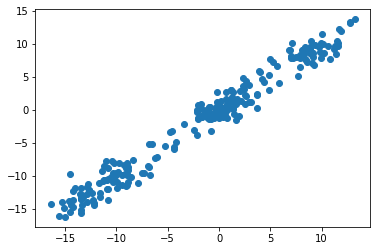

In [127]:
plt.scatter(df['z'], df['y'])

Case 2

In [128]:
n =240

y = np.zeros(n) 
z = np.zeros(n)

μy = np.zeros(n)
μz = np.zeros(n)



for i in range(0,n):
    
    vy = np.random.normal(0, 1, 1)
    vz = np.random.normal(0, 1, 1)

    
    εy = np.random.normal(0, 1, 1)
    εz = np.random.normal(0, 1, 1)
 
    
    μy[i] = μy[i-1] + vy
    μz[i] = μz[i-1] + vz

    
    y[i] = μy[i] + εy
    z[i] = μz[i] + εz


y = pd.Series(y)    
z = pd.Series(z)  


frame = {'y':y,'z':z}

df2 = pd.DataFrame(frame) 
df2.index = pd.period_range('1981-01-01', '2000-12-01', freq='M')
df2['y-z']=df2['y']-df2['z']

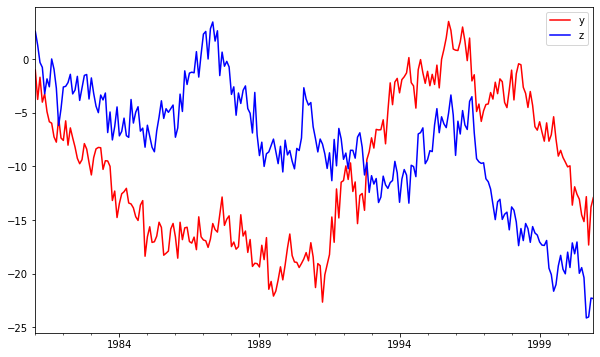

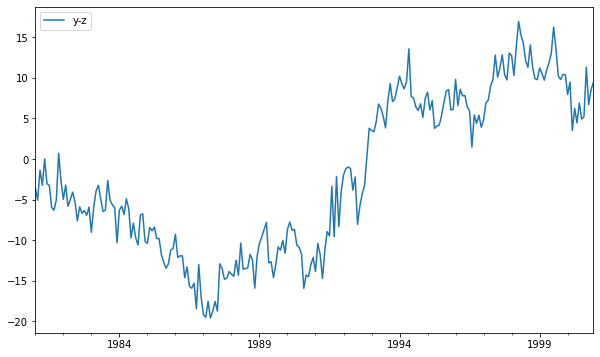

In [116]:
plt.figure(figsize=(10,6))
df2.y.plot(color='r')
df2.z.plot(color='b')
# df2.w.plot(color='g')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,6))
df2['y-z'].plot()
plt.legend(loc='best')
plt.show()

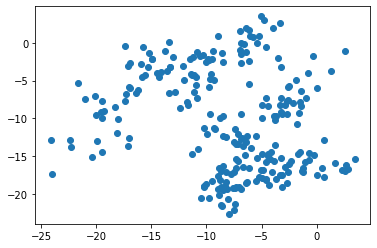

In [117]:
plt.scatter(df2['z'], df2['y'])

In [118]:
model=sm.OLS(df2['y'],df2['z'])
results = model.fit()
print(results.summary())
yf = results.fittedvalues
residuals = results.resid

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.383
Model:                            OLS   Adj. R-squared (uncentered):              0.381
Method:                 Least Squares   F-statistic:                              148.5
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                    6.97e-27
Time:                        12:11:04   Log-Likelihood:                         -883.86
No. Observations:                 240   AIC:                                      1770.
Df Residuals:                     239   BIC:                                      1773.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

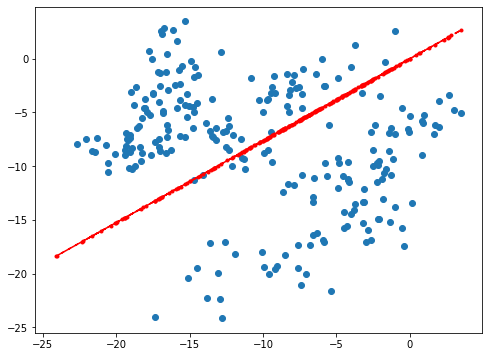

In [119]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df2['y'],df2['z'], 'o', label="data")
# ax.plot(x, y_true, 'b-', label="True")
ax.plot(df2['z'], yf, 'r--.', label="OLS")

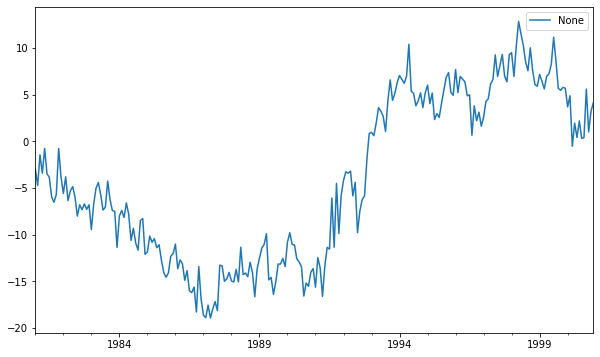

In [120]:
plt.figure(figsize=(10,6))
residuals.plot()
plt.legend(loc='best')
plt.show()